In [1]:
import json

import wandb
import pandas as pd
import numpy as np
import seaborn as sns

from rliable import library as rly
from rliable import metrics
from rliable import plot_utils


float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

_ = sns.set(style="darkgrid", palette="colorblind")

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import seaborn as sns

sns.set_style("white")

# Matplotlib params
from matplotlib import rcParams
from matplotlib import rc

rcParams['legend.loc'] = 'best'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rc('text', usetex=False)

In [3]:
def set_axes(ax, xlim, ylim, xlabel, ylabel):
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  ax.set_xlabel(xlabel, labelpad=14)
  ax.set_ylabel(ylabel, labelpad=14)
 
def set_ticks(ax, xticks, xticklabels, yticks, yticklabels):
  ax.set_xticks(xticks)
  ax.set_xticklabels(xticklabels)
  ax.set_yticks(yticks)
  ax.set_yticklabels(yticklabels)

def decorate_axis(ax, wrect=10, hrect=10, labelsize='large'):
  # Hide the right and top spines
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_linewidth(2)
  ax.spines['bottom'].set_linewidth(2)
  # Deal with ticks and the blank space at the origin
  ax.tick_params(length=0.1, width=0.1, labelsize=labelsize)
  # Pablos' comment
  ax.spines['left'].set_position(('outward', hrect))
  ax.spines['bottom'].set_position(('outward', wrect))

In [6]:
entity = "a-jesson"
projects = {
    "TD3": {
        "Ant-v4": "td3-5yz",
        "Reacher-v4": "td3-9z2",
        "InvertedDoublePendulum-v4": "td3-3vy",
        "Pusher-v4": "td3-5nn",
        "Humanoid-v4": "td3-1g0",
        "HumanoidStandup-v4": "td3-79p",
        "Swimmer-v4": "td3-2oo",
        "Hopper-v4": "td3-7jz",
        "HalfCheetah-v4": "td3-2k7",
        "Walker2d-v4": "td3-6ev",
    },
    "SAC": {
        "Ant-v4": "sac-m9v",
        "Reacher-v4": "sac-832",
        "InvertedDoublePendulum-v4": "sac-1xs",
        "Pusher-v4": "sac-26z",
        "Humanoid-v4": "sac-2bv",
        "HumanoidStandup-v4": "sac-9hu",
        "Swimmer-v4": "sac-1mt",
        "Hopper-v4": "sac-39a",
        "HalfCheetah-v4": "sac-qmw",
        "Walker2d-v4": "sac-wdj",
    },
    "PPO": {
        "Ant-v4": "ppo-977",
        "Reacher-v4": "ppo-2pj",
        "InvertedDoublePendulum-v4": "ppo-7r5",
        "Pusher-v4": "ppo-804",
        "Humanoid-v4": "ppo-2jo",
        "HumanoidStandup-v4": "ppo-3ox",
        "Swimmer-v4": "ppo-6p6",
        "Hopper-v4": "ppo-624",
        "HalfCheetah-v4": "ppo-f9y",
        "Walker2d-v4": "ppo-5kc",
    },
}

MUJOCO_ENVS = [
 "Ant-v4",
 "Reacher-v4",
 "InvertedDoublePendulum-v4",
 "Pusher-v4",
 "Humanoid-v4",
 "HumanoidStandup-v4",
 "Swimmer-v4",
 "Hopper-v4",
 "HalfCheetah-v4",
 "Walker2d-v4",
]

algorithms = list(projects.keys())

In [7]:
def get_last_avg_return(entity, projects, window=100):
    output = {}
    for method, mapping in projects.items():
        print(method)
        method_output = {}
        api = wandb.Api()
        for project, exp in mapping.items():
            print(project)
            runs = api.runs(entity + "/" + project)
            values = [0]*10
            for run in runs:
                _, experiment, seed, _ = run.name.split("__")
                if experiment == exp:
                    print(experiment, seed)
                    history = run.scan_history(keys=["charts/episodic_return", "global_step"], min_step=run.lastHistoryStep - window)
                    df_ = pd.DataFrame(history)
                    if "charts/episodic_return" in df_.columns:
                        values[int(seed)] = df_.loc[-window:, "charts/episodic_return"].mean()
                    else:
                        print(df_.columns)
                        values[int(seed)] = np.nan
            method_output.update({project: values})
        output.update({method: method_output})
    return output

In [8]:
mujoco_data_dict = get_last_avg_return(entity, projects)

TD3
Ant-v4
td3-5yz 9
td3-5yz 8
td3-5yz 7
td3-5yz 6
td3-5yz 5
td3-5yz 4
td3-5yz 3
td3-5yz 2
td3-5yz 0
td3-5yz 1
Reacher-v4
td3-9z2 9
td3-9z2 8
td3-9z2 7
td3-9z2 6
td3-9z2 5
td3-9z2 3
td3-9z2 1
td3-9z2 0
td3-9z2 2
td3-9z2 4
InvertedDoublePendulum-v4
td3-3vy 9
td3-3vy 8
td3-3vy 7
td3-3vy 6
td3-3vy 5
td3-3vy 3
td3-3vy 2
td3-3vy 0
td3-3vy 4
td3-3vy 1
Pusher-v4
td3-5nn 9
td3-5nn 8
td3-5nn 7
td3-5nn 6
td3-5nn 5
td3-5nn 0
td3-5nn 4
td3-5nn 3
td3-5nn 1
td3-5nn 2
Humanoid-v4
td3-1g0 9
td3-1g0 8
td3-1g0 7
td3-1g0 6
td3-1g0 5
td3-1g0 1
td3-1g0 4
td3-1g0 3
td3-1g0 2
td3-1g0 0
HumanoidStandup-v4
td3-79p 9
td3-79p 8
td3-79p 7
td3-79p 6
td3-79p 5
td3-79p 4
td3-79p 3
td3-79p 0
td3-79p 2
td3-79p 1
Swimmer-v4
td3-2oo 9
td3-2oo 8
td3-2oo 7
td3-2oo 6
td3-2oo 5
td3-2oo 1
td3-2oo 0
td3-2oo 4
td3-2oo 2
td3-2oo 3
Hopper-v4
td3-7jz 9
td3-7jz 8
td3-7jz 7
td3-7jz 6
td3-7jz 5
td3-7jz 1
td3-7jz 2
td3-7jz 0
td3-7jz 4
td3-7jz 3
HalfCheetah-v4
td3-2k7 9
td3-2k7 8
td3-2k7 7
td3-2k7 6
td3-2k7 5
td3-2k7 3
td3-2k7 0
td3-2

In [19]:
mujoco_data_dict["A3C"]

{'Ant-v4': [1014.871826171875,
  1014.871826171875,
  1387.8470458984375,
  953.394775390625,
  1014.871826171875,
  -28.263219020984792,
  1732.421875,
  1014.871826171875,
  1014.871826171875,
  1014.871826171875],
 'Reacher-v4': [-15.015875469554555,
  -14.093965963883834,
  -17.08198373967951,
  -9.17187203060497,
  -17.95971142161976,
  -19.52136402130127,
  -74.97574806213379,
  -47.87842559814453,
  -24.42415580749512,
  -16.634842109680175],
 'InvertedDoublePendulum-v4': [77.53319158786681,
  121.90548548205146,
  96.0127541513154,
  80.56638736724854,
  69.811513767686,
  155.5638659933339,
  93.09520093132468,
  467.7702865600586,
  165.64189579175866,
  124.70665783352322],
 'Pusher-v4': [-40.17948913574219,
  -42.81623077392578,
  -49.90668614705404,
  -45.9111328125,
  -48.41245333353678,
  -41.835272216796874,
  -55.58932622273763,
  -47.67497634887695,
  -126.88477783203125,
  -48.66683578491211],
 'Humanoid-v4': [534.8632888793945,
  450.6586608886719,
  555.11698150634

In [ ]:
mujoco_data_dict.update(
    get_last_avg_return(
        "vsop", 
        {
            "VSOP": {
                "Ant-v4": "vsop-4e2",
                "Reacher-v4": "vsop-382",
                "InvertedDoublePendulum-v4": "vsop-9kl",
                "Pusher-v4": "vsop-13w",
                "Humanoid-v4": "vsop-190",
                "HumanoidStandup-v4": "vsop-5c1",
                "Swimmer-v4": "vsop-1om",
                "Hopper-v4": "vsop-7dy",
                "HalfCheetah-v4": "vsop-1ta",
                "Walker2d-v4": "vsop-32r",
            },
            "VSPPO": {
                "Ant-v4": "ppo-9ul",
                "Reacher-v4": "ppo-88m",
                "InvertedDoublePendulum-v4": "ppo-29t",
                "Pusher-v4": "ppo-6tk",
                "Humanoid-v4": "ppo-zim",
                "HumanoidStandup-v4": "ppo-5cs",
                "Swimmer-v4": "ppo-mly",
                "Hopper-v4": "ppo-7qu",
                "HalfCheetah-v4": "ppo-57t",
                "Walker2d-v4": "ppo-4dp",
            },
            "RMPG": {
                "Ant-v4": "rmpg-7dp",
                "Reacher-v4": "rmpg-9v7",
                "InvertedDoublePendulum-v4": "rmpg-7c3",
                "Pusher-v4": "rmpg-9e4",
                "Humanoid-v4": "rmpg-31e",
                "HumanoidStandup-v4": "rmpg-7hv",
                "Swimmer-v4": "rmpg-3lj",
                "Hopper-v4": "rmpg-4yc",
                "HalfCheetah-v4": "rmpg-26y",
                "Walker2d-v4": "rmpg-1sn",
            },
        }
    )
)

In [16]:
with open("mujoco_results.json", "r") as fp:
    ppo_dict = json.load(fp)

# with open("mujoco_spectral.json", "r") as fp:
#     vsop_dict = json.load(fp)

# vsop_dict = vsop_dict["04/512/True"]

# mujoco_data_dict.update({"PPO": ppo_dict["PPO"]})
mujoco_data_dict.update({"A3C": ppo_dict["A3C"]})
# mujoco_data_dict.update({"RMPG": ppo_dict["RMPG"]})

In [18]:
for method, data in mujoco_data_dict.items():
    for environment, scores in data.items():
        nan_mask = np.isnan(scores)
        for i, is_nan in enumerate(nan_mask):
            if is_nan:
                mujoco_data_dict[method][environment][i] = np.nanmedian(scores)

In [20]:
def score_normalization_mujoco(res_dict, min_scores, max_scores):
  norm_scores = {}
  for game, scores in res_dict.items():
    norm_scores[game] = (np.array(scores) - min_scores[game])/(max_scores[game] - min_scores[game])
  return norm_scores

def convert_to_matrix(score_dict):
   keys = sorted(list(score_dict.keys()))
   return np.stack([score_dict[k] for k in keys], axis=1)

In [21]:
IQM = lambda x: metrics.aggregate_iqm(x) # Interquartile Mean
OG = lambda x: metrics.aggregate_optimality_gap(x, 1.0) # Optimality Gap
MEAN = lambda x: metrics.aggregate_mean(x)
MEDIAN = lambda x: metrics.aggregate_median(x)

In [22]:
# Create PPO Normalization
MEAN_PPO_SCORES = {key: np.mean(val) for key, val in mujoco_data_dict['PPO'].items()}
ZERO_SCORES = {key: 0.0 for key in MUJOCO_ENVS}
ppo_mujoco_normalize = lambda scores: score_normalization_mujoco(
    scores, ZERO_SCORES, MEAN_PPO_SCORES
)

algorithms = list(mujoco_data_dict.keys())
norm_mujoco_data = {'PPO': {}}
for method in algorithms:
  scores = mujoco_data_dict[method]
  norm_mujoco_data['PPO'][method] = convert_to_matrix(
      ppo_mujoco_normalize(scores)
    )

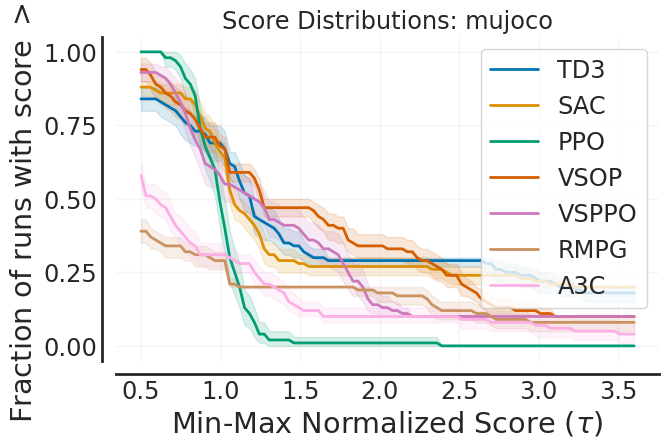

In [23]:
mujoco_tau = np.linspace(0.5, 3.6, 101)
mujoco_profiles, mujoco_profile_cis = rly.create_performance_profile(
    norm_mujoco_data['PPO'], mujoco_tau, reps=2000)


fig, ax = plt.subplots(figsize=(7, 4.2))
plot_utils.plot_performance_profiles(
  mujoco_profiles, mujoco_tau,
  performance_profile_cis=mujoco_profile_cis,  
  xlabel=r'Min-Max Normalized Score $(\tau)$',
  labelsize='xx-large',
  legend=True, ax=ax)
ax.set_title('Score Distributions: mujoco', size='x-large')
plt.show()

In [24]:
mujoco_ppo_scores = norm_mujoco_data['PPO']
aggregate_func = lambda x: np.array([MEDIAN(x), IQM(x), MEAN(x)])
aggregate_scores, aggregate_interval_estimates = rly.get_interval_estimates(
    mujoco_ppo_scores, aggregate_func, reps=50000)

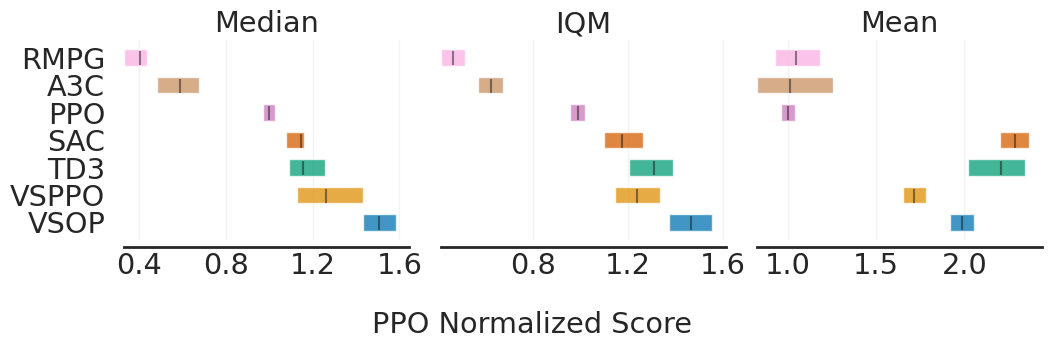

In [25]:
algorithms = [
    "VSOP", 
    "VSPPO",
    "TD3", 
    "SAC",
    "PPO", 
    "A3C",
    "RMPG",
]
fig, axes = plot_utils.plot_interval_estimates(
    aggregate_scores, 
    aggregate_interval_estimates,
    metric_names = ['Median', 'IQM', 'Mean'],
    algorithms=algorithms,
    xlabel_y_coordinate=-0.25,
    xlabel='PPO Normalized Score',
    # colors={
    #     "PPO": "C1",
    #     "VSOP": "C0",
    #     "VSPPO": "C3",
    #     "A3C": "C2",
    #     "RMPG": "C5",
    # }
)
plt.show()

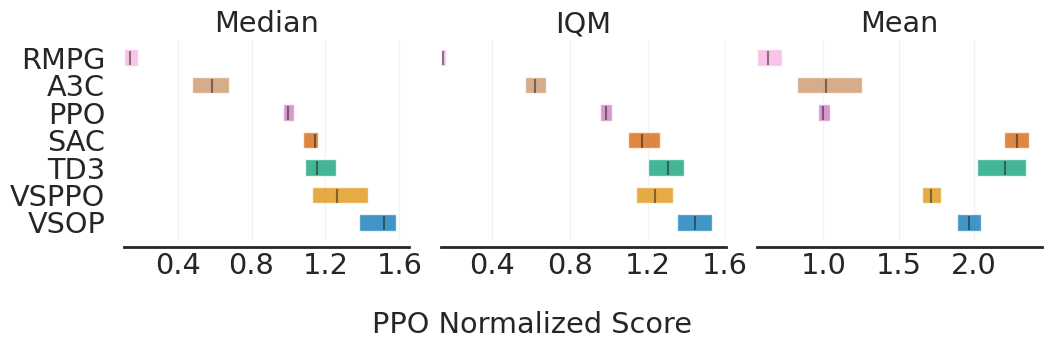

In [38]:
algorithms = [
    "VSOP", 
    "VSPPO",
    "TD3", 
    "SAC",
    "PPO", 
    "A3C",
    "RMPG",
]
fig, axes = plot_utils.plot_interval_estimates(
    aggregate_scores, 
    aggregate_interval_estimates,
    metric_names = ['Median', 'IQM', 'Mean'],
    algorithms=algorithms,
    xlabel_y_coordinate=-0.25,
    xlabel='PPO Normalized Score',
    # colors={
    #     "PPO": "C1",
    #     "VSOP": "C0",
    #     "VSPPO": "C3",
    #     "A3C": "C2",
    #     "RMPG": "C5",
    # }
)
plt.show()

In [25]:
mujoco_data_dict["VSPPO"]

{'Ant-v4': [3536.025596516927,
  3123.188278700176,
  3896.668193181356,
  3309.0856713746725,
  3835.0403825527915,
  3949.375369664785,
  3592.4945403289794,
  3449.8931855773926,
  3673.2269425263275,
  3820.135199586006],
 'Reacher-v4': [-4.694778585674787,
  -4.186410289220135,
  -11.195253432399095,
  -10.606728467074307,
  -4.492865135475081,
  -4.6481773100718105,
  -9.816101584771667,
  -4.869237006312669,
  -4.918609009246634,
  -7.267788040517557],
 'InvertedDoublePendulum-v4': [6445.005283203125,
  5906.997941401098,
  7079.571257720122,
  7172.069842194857,
  6810.316170666669,
  7015.737956279033,
  7405.023015688544,
  6136.1466064453125,
  6282.22465756065,
  6539.857148030599],
 'Pusher-v4': [-61.94222125810446,
  -49.726521611213684,
  -38.567556459879135,
  -29.188573718070984,
  -50.8825155099233,
  -29.144165864924794,
  -31.366213493740435,
  -51.10310037357291,
  -65.32905983679073,
  -46.89438933134079],
 'Humanoid-v4': [4330.281841880397,
  4294.29100789388,
  

In [19]:
pairs = [
  ["VSOP", "RMPG"],
  ["VSOP", "A3C"],
  ['VSOP', 'PPO'],
  ['VSPPO', 'PPO'],
  ['VSOP', 'VSPPO'],
  # ["VSPPO", "A3C"],
  # ["VSPPO", "RMPG"]
]

mujoco_algorithm_pairs = {}
for pair in pairs[::-1]:
  d1 = norm_mujoco_data['PPO'][pair[0]]
  d2 = norm_mujoco_data['PPO'][pair[1]]
  # d_concat = np.concatenate((d1, d2), axis=-1)
  mujoco_algorithm_pairs['_'.join(pair)] = (d1, d2)

probabilities, probability_cis = rly.get_interval_estimates(
    mujoco_algorithm_pairs, metrics.probability_of_improvement, reps=2000)

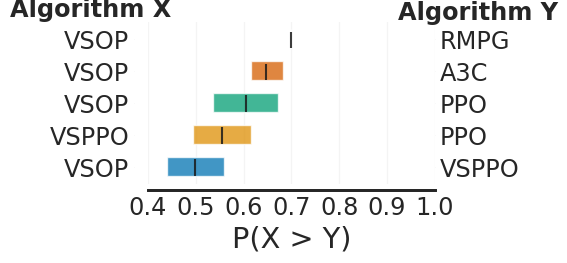

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.7, 2.1))
h = 0.6

ax2 = ax.twinx()
colors = sns.color_palette('colorblind')

for i, (pair, p) in enumerate(probabilities.items()):  
  (l, u), p  = probability_cis[pair], p

  ax.barh(y=i, width=u-l, height=h, 
          left=l, color=colors[i], 
          alpha=0.75, label=pair[0])
  ax2.barh(y=i, width=u-l, height=h, 
          left=l, color=colors[i], 
          alpha=0.0, label=pair[1])
  ax.vlines(x=p, ymin=i-7.5 * h/16, ymax=i+(6*h/16),
            color='k', alpha=0.85)
  

ax.set_yticks(list(range(len(pairs))))
ax2.set_yticks(range(len(pairs)))
pairs = [x.split('_') for x in probabilities.keys()]
ax2.set_yticklabels([pair[1] for pair in pairs], fontsize='large')
ax.set_yticklabels([pair[0] for pair in pairs], fontsize='large')
ax2.set_ylabel('Algorithm Y', fontweight='bold', rotation='horizontal', fontsize='x-large')
ax.set_ylabel('Algorithm X', fontweight='bold', rotation='horizontal', fontsize='x-large')
ax.set_xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.yaxis.set_label_coords(-0.2, 1.0)
ax2.yaxis.set_label_coords(1.15, 1.13)
decorate_axis(ax, wrect=5)
decorate_axis(ax2, wrect=5)
       
ax.tick_params(axis='both', which='major', labelsize='x-large')
ax2.tick_params(axis='both', which='major', labelsize='x-large')
ax.set_xlabel('P(X > Y)', fontsize='xx-large')
ax.grid(axis='x', alpha=0.2)
plt.subplots_adjust(wspace=0.05)
ax.spines['left'].set_visible(False)
ax2.spines['left'].set_visible(False)


plt.show()

In [28]:
projects = {
    "A3C": {
        "Ant-v4": "a2c-6wg",
        "InvertedDoublePendulum-v4": "a2c-5mc",
        "Humanoid-v4": "a2c-71e",
        "Hopper-v4": "a2c-1rd",
        "Walker2d-v4": "a2c-168",
    },
    "VSPPO": {
        "Ant-v4": "vsppo-3f4",
        "InvertedDoublePendulum-v4": "vsppo-96i",
        "Humanoid-v4": "vsppo-5yo",
        "Hopper-v4": "vsppo-7yf",
        "Walker2d-v4": "vsppo-71w",
    },
    "VSOP": {
        "Ant-v4": "vsop-3i4",
        "InvertedDoublePendulum-v4": "vsop-6ud",
        "Humanoid-v4": "vsop-24u",
        "Hopper-v4": "vsop-2pm",
        "Walker2d-v4": "vsop-977",
    },
    "RMPG": {
        "Ant-v4": "rmpg-o2u",
        "InvertedDoublePendulum-v4": "rmpg-8g0",
        "Humanoid-v4": "rmpg-7xu",
        "Hopper-v4": "rmpg-5eq",
        "Walker2d-v4": "rmpg-4qs",
    },
    "PPO": {
        "Ant-v4": "ppo-977",
        "InvertedDoublePendulum-v4": "ppo-7r5",
        "Humanoid-v4": "ppo-2jo",
        "Hopper-v4": "ppo-624",
        "Walker2d-v4": "ppo-5kc",
    },
}

def get_episodic_length(entity, projects, window=100):
    output = {}
    for method, mapping in projects.items():
        print(method)
        method_output = {}
        api = wandb.Api()
        for project, exp in mapping.items():
            print(project)
            runs = api.runs(entity + "/" + project)
            values = [0]*10
            for run in runs:
                _, experiment, seed, _ = run.name.split("__")
                if experiment == exp:
                    print(experiment, seed)
                    history = run.scan_history(keys=["charts/episodic_length", "global_step"], min_step=run.lastHistoryStep - window)
                    df_ = pd.DataFrame(history)
                    if "charts/episodic_length" in df_.columns:
                        values[int(seed)] = (df_.loc[-window:, "charts/episodic_length"] < 1000).mean()
                        print(values[int(seed)])
                    else:
                        print(df_.columns)
                        values[int(seed)] = np.nan
            method_output.update({project: values})
        output.update({method: method_output})
    return output

In [29]:
mujoco_data_dict_caution = get_episodic_length(entity, projects)

A3C
Ant-v4
a2c-6wg 9
RangeIndex(start=0, stop=0, step=1)
a2c-6wg 8
RangeIndex(start=0, stop=0, step=1)
a2c-6wg 7
0.0
a2c-6wg 6
0.0
a2c-6wg 5
1.0
a2c-6wg 4
RangeIndex(start=0, stop=0, step=1)
a2c-6wg 2
0.0
a2c-6wg 0
RangeIndex(start=0, stop=0, step=1)
a2c-6wg 3
0.0
a2c-6wg 1
RangeIndex(start=0, stop=0, step=1)
InvertedDoublePendulum-v4
a2c-5mc 9
1.0
a2c-5mc 8
1.0
a2c-5mc 7
1.0
a2c-5mc 6
1.0
a2c-5mc 5
1.0
a2c-5mc 0
1.0
a2c-5mc 3
1.0
a2c-5mc 2
1.0
a2c-5mc 1
1.0
a2c-5mc 4
1.0
Humanoid-v4
a2c-71e 9
1.0
a2c-71e 8
1.0
a2c-71e 7
1.0
a2c-71e 6
1.0
a2c-71e 5
1.0
a2c-71e 3
1.0
a2c-71e 1
1.0
a2c-71e 4
1.0
a2c-71e 2
1.0
a2c-71e 0
1.0
Hopper-v4
a2c-1rd 9
1.0
a2c-1rd 8
1.0
a2c-1rd 7
1.0
a2c-1rd 6
1.0
a2c-1rd 5
RangeIndex(start=0, stop=0, step=1)
a2c-1rd 1
1.0
a2c-1rd 3
1.0
a2c-1rd 2
1.0
a2c-1rd 4
RangeIndex(start=0, stop=0, step=1)
a2c-1rd 0
1.0
Walker2d-v4
a2c-168 9
1.0
a2c-168 8
1.0
a2c-168 7
1.0
a2c-168 6
1.0
a2c-168 5
1.0
a2c-168 4
1.0
a2c-168 2
1.0
a2c-168 0
1.0
a2c-168 3
RangeIndex(start=0, sto

In [30]:
# Create PPO Normalization
MEAN_PPO_SCORES = {key: np.mean(val) for key, val in mujoco_data_dict_caution['PPO'].items()}
ZERO_SCORES = {key: 0.0 for key in MUJOCO_ENVS}
ppo_mujoco_normalize = lambda scores: score_normalization_mujoco(
    scores, ZERO_SCORES, MEAN_PPO_SCORES
)

algorithms = list(mujoco_data_dict_caution.keys())
norm_mujoco_data = {'PPO': {}}
for method in algorithms:
  scores = mujoco_data_dict_caution[method]
  norm_mujoco_data['PPO'][method] = convert_to_matrix(
      ppo_mujoco_normalize(scores)
    )

In [31]:
mujoco_ppo_scores = norm_mujoco_data['PPO']
aggregate_func = lambda x: np.array([MEDIAN(x), IQM(x), MEAN(x)])
aggregate_scores, aggregate_interval_estimates = rly.get_interval_estimates(
    mujoco_ppo_scores, aggregate_func, reps=50000)

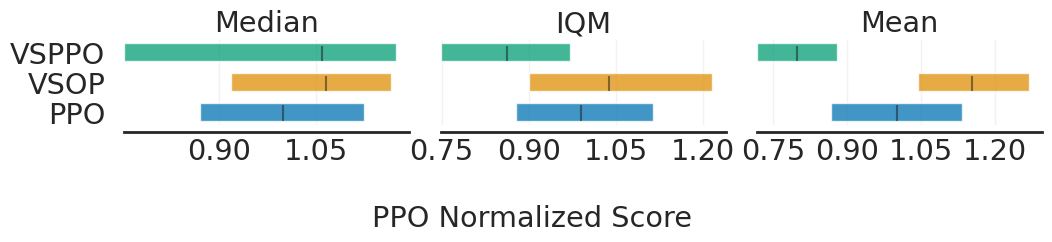

In [33]:
algorithms = ["PPO", "VSOP", "VSPPO"]
fig, axes = plot_utils.plot_interval_estimates(
    aggregate_scores, 
    aggregate_interval_estimates,
    metric_names = ['Median', 'IQM', 'Mean'],
    algorithms=algorithms,
    xlabel_y_coordinate=-0.8,
    xlabel='PPO Normalized Score')

plt.show()

In [37]:
print(1 - np.mean(mujoco_data_dict_caution["VSOP"]["Ant-v4"]))
print(1 - np.mean(mujoco_data_dict_caution["VSPPO"]["Ant-v4"]))
print(1 - np.mean(mujoco_data_dict_caution["PPO"]["Ant-v4"]))

0.42802418249858776
0.8462056996711729
0.765570043954298


In [38]:
print(1 - np.mean(mujoco_data_dict_caution["VSOP"]["Hopper-v4"]))
print(1 - np.mean(mujoco_data_dict_caution["VSPPO"]["Hopper-v4"]))
print(1 - np.mean(mujoco_data_dict_caution["PPO"]["Hopper-v4"]))

0.21296183530042934
0.15349071213361198
0.26210905320372246


In [39]:
print(1 - np.mean(mujoco_data_dict_caution["VSOP"]["Walker2d-v4"]))
print(1 - np.mean(mujoco_data_dict_caution["VSPPO"]["Walker2d-v4"]))
print(1 - np.mean(mujoco_data_dict_caution["PPO"]["Walker2d-v4"]))

1.0
0.5709373659373659
0.6200500603415362


In [40]:
print(1 - np.mean(mujoco_data_dict_caution["VSOP"]["Humanoid-v4"]))
print(1 - np.mean(mujoco_data_dict_caution["VSPPO"]["Humanoid-v4"]))
print(1 - np.mean(mujoco_data_dict_caution["PPO"]["Humanoid-v4"]))

0.07659332460474477
1.0
0.0


In [41]:
print(1 - np.mean(mujoco_data_dict_caution["VSOP"]["InvertedDoublePendulum-v4"]))
print(1 - np.mean(mujoco_data_dict_caution["VSPPO"]["InvertedDoublePendulum-v4"]))
print(1 - np.mean(mujoco_data_dict_caution["PPO"]["InvertedDoublePendulum-v4"]))

0.8699326993504076
0.8971787845573012
0.9029704055535258


In [32]:
with open("mujoco_results.json", "w") as fp:
    json.dump(mujoco_data_dict, fp)